In [1]:
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Step: Load the dataset
dataset = pd.read_excel('data_pizza.xlsx')

<Figure size 2000x1000 with 0 Axes>

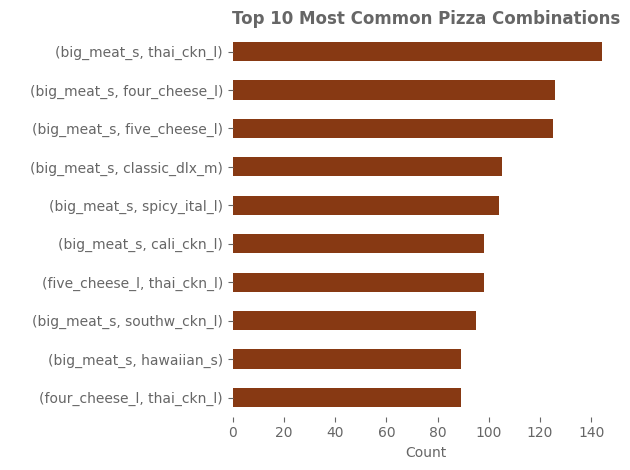

In [4]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame(pizza_id, order_id, order_detail_id, quantity)
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:

import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Group by order_id and create a list of pizzas in each multi-item order
multi_item_orders = dataset.groupby('order_id')['pizza_id'].apply(list).reset_index()

# Filter out single-item orders (only keep rows where there is more than one pizza)
multi_item_orders = multi_item_orders[multi_item_orders['pizza_id'].apply(lambda x: len(x) > 1)]

# Generate all possible pizza combinations (pairs, triples, etc.)
all_combinations = []
for pizzas in multi_item_orders['pizza_id']:
    for r in range(2, len(pizzas) + 1):  # r represents the combination size, from 2 to n (all combinations)
        all_combinations.extend(combinations(sorted(pizzas), r))  # Generate combinations of length r

# Count the frequency of each pizza combination
combination_counts = Counter(all_combinations)

# Convert the result into a DataFrame for easier visualization
common_combinations_df = pd.DataFrame(combination_counts.items(), columns=['Pizza Combination', 'Count'])

# Sort combinations by frequency
common_combinations_df = common_combinations_df.sort_values(by='Count', ascending=False)

# Plot the top 10 combinations
plt.figure(figsize=(20, 10))
ax = common_combinations_df.head(10).sort_values(by='Count', ascending=True).plot(
    kind='barh',
    x='Pizza Combination',
    legend=False,
    color='#873913',
    edgecolor=None  # Removes border around bars
)

# Customize the plot
# Hide the entire baseline lines (x-axis and y-axis)
for spine in ['left', 'right', 'bottom', 'top']:
    ax.spines[spine].set_visible(False)

# Adjust tick and label colors
ax.tick_params(axis='x', colors='#666666')  # Change color of x-axis ticks
ax.tick_params(axis='y', colors='#666666')  # Change color of y-axis ticks

# Add title with color, font size 12, and bold style
plt.title('Top 10 Most Common Pizza Combinations', fontsize=12, fontweight='bold', color='#666666')

# Change x-axis and y-axis label colors
plt.xlabel('Count', color='#666666')
plt.ylabel(' ', color='#666666')

plt.tight_layout()
plt.show()
